<a href="https://colab.research.google.com/github/rlgarcia79/ENAP_CienciaDados/blob/main/RelatorioFinal_D8_RAFAEL_GARCIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Especialização em Ciência de Dados aplicada a Políticas Públicas - ENAP

Disciplina: **D8 - Estatística Inferencial**

Aluno: **Rafael Leal Garcia**

Professor: **James Sampaio**

In [3]:
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_ind

import seaborn as sns
import matplotlib.pyplot as plt


#from google.colab import drive
#drive.mount('/drive', force_remount=True)

import warnings
warnings.filterwarnings("ignore")

**BASE DE DADOS 01**
---


**OBJETIVO:**

Esse banco contém duas populações de tamanho 10.000. O objetivo é comparar a média de ambos. Inicialmente, o estudante pode tomar uma amostra piloto de tamanho 100 para decidir o tamanho das amostrar para cada população. Em seguida serão necessários a construção de histogramas e boxplots, testar a normalidade, construir intervalos de confiança para a média e variância, analisar previamente a hipótese de igualdade das variâncias e, finalmente, realizar o teste adequado.

In [96]:
#----------------------------------------------------------------------------------------------------
# Arquivo/pasta do GitHub contendo os dados da BASE 01
#----------------------------------------------------------------------------------------------------
s_githubpath_entrada = 'https://raw.githubusercontent.com/rlgarcia79/ENAP_CienciaDados/main/'
s_arquivo_entrada = 'rafael.leal.garciabase1.csv'

#-----------------------------------------------------------------------------
# Carrega o arquivo com os dados da BASE 01
#-----------------------------------------------------------------------------
df_base_01 = pd.read_csv(s_githubpath_entrada + s_arquivo_entrada)

**1. EXPLORANDO A BASE DE DADOS 01**





In [97]:
# Qtde de linhas e colunas
df_base_01.shape

(10000, 2)

In [98]:
#Primeiros registros
df_base_01.head(10)

,pop1,pop2
0,1997.883817,2011.277557
1,1994.387924,2021.041513
2,2002.330362,1986.476371
3,1987.652168,1990.808700
4,1977.132627,1984.367525
5,1990.663410,1999.438364
6,1973.590496,2004.981835
7,1985.773286,1991.222810
8,1998.884692,2020.009067
9,1999.709858,1984.199251


In [99]:
#Ultimos registros
df_base_01.tail(10)

,pop1,pop2
9990,2000.424760,2003.513931
9991,1994.527861,1980.948056
9992,2022.276945,1998.791710
9993,1993.486906,2008.891410
9994,1999.125441,2038.436165
9995,1997.849976,2001.318114
9996,1993.577883,1990.467612
9997,1988.345857,1998.557996
9998,2014.175616,2017.397455
9999,2012.053286,2026.827392


In [100]:
#Verificando o tipo de dados
df_base_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pop1    10000 non-null  float64
 1   pop2    10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


***RESULTADO:***

*1) A base contém duas colunas, representando duas populações, pop1 e pop2, com 10.000 registros cada.*

*2) Não existem registros NULOS*

*3) As duas colunas são numéricas do tipo float64*

**2. CÁLCULO DA MÉDIA, DESVIO PADRÃO E VARIÂNCIA DAS POPULAÇÕES**



In [101]:
# Cria funcao que calcula a estatistica básica
def estatisca_basica(df):
  n_mean = np.mean(df)
  n_std = np.std(df, ddof=1)
  n_var = np.var(df, ddof=1)
  print(f'Variável {df.name}\nMédia: {n_mean:.2f} \nDesvio Padrão: {n_std:.2f} \nVariância: {n_var:.2f}\n\n')
  return n_mean, n_std, n_var

In [102]:
variaveis = ['pop1', 'pop2']

for i in variaveis:
  n_mean, n_std, n_var = estatisca_basica(df_base_01[i])

Variável pop1
Média: 1999.92 
Desvio Padrão: 12.32 
Variância: 151.71


Variável pop2
Média: 1999.95 
Desvio Padrão: 15.76 
Variância: 248.23




**3. AVALIAÇÃO VISUAL DAS POPULAÇÕES POP1 E POP2 (10.000 REGISTROS)**

Avalição prévia dos dados para criação da situação problema 

**3.1 HISTOGRAMA E BOXPLOT DAS POPULACÕES**

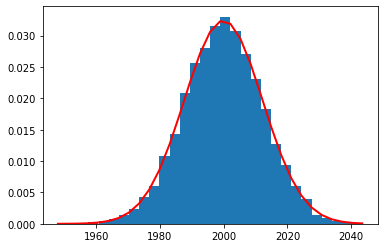

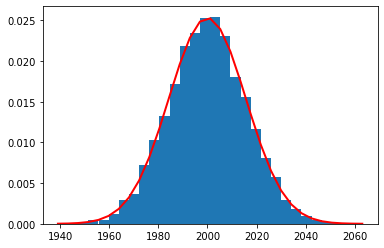

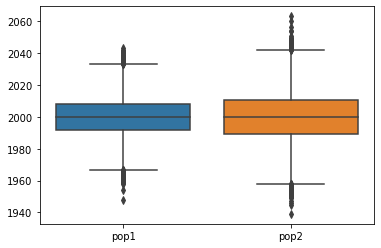

In [103]:
sigma = np.std(df_base_01['pop1'])
mu = np.mean(df_base_01['pop1'])

count, bins, ignored = plt.hist(df_base_01['pop1'], 30, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

sigma = np.std(df_base_01['pop2'])
mu = np.mean(df_base_01['pop2'])

count, bins, ignored = plt.hist(df_base_01['pop2'], 30, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

ax = sns.boxplot(data=df_base_01)
plt.show()

***RESULTADO:***

*DISTRIBUIÇÃO DOS DADOS SUGERE QUE AMBAS AS POPULAÇÕES SÃO NORMAIS E POSSUEM A MESMA MÉDIA*

**3.2 DEFINICAO DO TAMANHO DA AMOSTRA**

In [104]:
def tamanhoAmostra(e, N):

    n = (N / (1 + (N*(e**2))))

    return (n)

nivel_significancia = 0.05
pop = 10000

n_amostra = int(tamanhoAmostra(nivel_significancia, pop))

print(f'O tamanho da amostra ideal é de = {n_amostra:.0f}')

O tamanho da amostra ideal é de = 384


**4. SITUAÇÃO PROBLEMA: AVALIAÇÃO DE UM MÉTODO MANUAL DE MEDIÇÃO**

Um professor de matemática, ao ensinar geometria, propôs a dois alunos que criassem um instrumento próprio para medição de uma árvore.

Cada aluno realizou 10000 medições (em centímetros) utilizando o seu instrumento em diferentes momentos.

O professor então selecionou duas amostras aleatórias com 385 medições de cada aluno e foi testar a hipótese de que os métodos desenvolvidos pelos alunos chegaram ao mesmo resultado, isto é, continham a mesma média para as medições, considerando um nível de 5% de significância.

**4.1 AMOSTRA ALEATORIA SIMPLES**


In [105]:
#DEFINE UMA AMOSTRA DE 100 PARA CADA POPULACAO
df_sample_pop1 = df_base_01['pop1'].sample(n=n_amostra)
df_sample_pop2 = df_base_01['pop2'].sample(n=n_amostra)

**4.2 ESTUDO DA AMOSTRA DO ALUNO 01**

Variável pop1
Média: 1999.38 
Desvio Padrão: 12.55 
Variância: 157.49




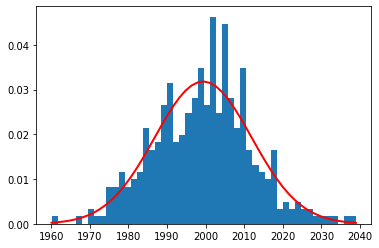

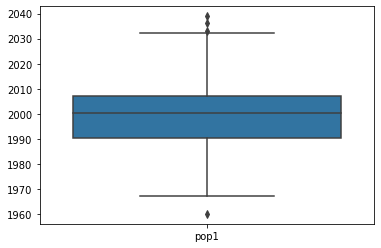

In [106]:
#MEDIA E DESVIO PARA A AMOSTRA DA POP1
n_mean, n_std, n_var = estatisca_basica(df_sample_pop1)

#HISTOGRAMA POP 01
sigma = n_std
mu = n_mean
count, bins, ignored = plt.hist(df_sample_pop1, 50, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

#BOXPLOT POP 01
ax = sns.boxplot(data= pd.DataFrame(df_sample_pop1))
plt.show()

**4.3 ESTUDO DA AMOSTRA DO ALUNO 02**

Variável pop2
Média: 1999.90 
Desvio Padrão: 15.97 
Variância: 255.04




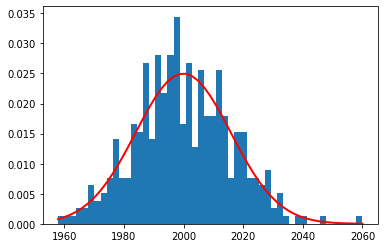

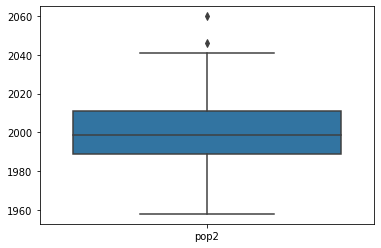

In [107]:
#MEDIA E DESVIO PARA A AMOSTRA DA POP2
n_mean, n_std, n_var = estatisca_basica(df_sample_pop2)

#HISTOGRAMA POP 02
sigma = n_std
mu = n_mean
count, bins, ignored = plt.hist(df_sample_pop2, 50, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

#BOXPLOT POP 02
ax = sns.boxplot(data= pd.DataFrame(df_sample_pop2))
plt.show()

***RESULTADO:***

*De acordo com a visualização preliminar da distribuição (via histograma)  a partir dos dados das amostras com 100 medições dos ALUNOS 01 e 02 em comparação com uma distribuição normal "semelhante", é possível que ambas amostras (POPULACAO 01 e POPULACAO 02) assumam distribuição aproximadamente NORMAIS, visto que tendem a uma forma de "sino", no entanto não podemos afirmar com certeza.*

*Desse modo, vamos realizar o teste de normalidade para confirmar tal hipotese*

**4.4 TESTE DE NORMALIDADE DAS AMOSTRAS DO ALUNO 01 E ALUNO 02 - TESTE DE SHAPIRO**

In [108]:
# CRIA FUNCAO TESTE DE NORMALIDADE
def teste_normal(df):
  stat, pvalue = stats.shapiro(df)
  print('Statistics=%.3f, pvalue=%.3f' % (stat, pvalue))

  if pvalue > 0.05:
    print('Distribuição da variável ' + df.name + ' é normal (falha ao rejeitar H0)\n')
  else:
    print('Distribuição da variável ' + df.name + ' não é normal(rejeita H0)\n')

teste_normal(df_sample_pop1)
teste_normal(df_sample_pop2)

Statistics=0.997, pvalue=0.616
Distribuição da variável pop1 é normal (falha ao rejeitar H0)

Statistics=0.997, pvalue=0.621
Distribuição da variável pop2 é normal (falha ao rejeitar H0)



***RESULTADO:***

*A distribuição dos resultados das medições do ALUNO 01 (pop1) e do ALUNO 02 (pop2) são NORMAIS (falha ao rejeitar H0)*

**4.5 INTERVALO DE CONFIANCA DA MÉDIA**

In [109]:
#Funcao que calcula o intervalo de confianca da média
def confidence_interval (nivel_confianca, df_sample):  
  n_tamanho = df_sample.size - 1
  sample_mean = np.mean(df_sample)
  sample_standard_error = np.std(df_sample, ddof=1)
  
  return t.interval(nivel_confianca, n_tamanho, sample_mean, sample_standard_error/np.sqrt(len(df_sample)))

In [110]:
nivel_confianca = 0.95
n_min, nmax = confidence_interval(nivel_confianca, df_sample_pop1)
print(f'Com intervalo de confiança de {nivel_confianca*100}%, a média da variável {df_sample_pop1.name} está entre {n_min:.2f} e {nmax:.2f}\n')

n_min, nmax = confidence_interval(nivel_confianca, df_sample_pop2)
print(f'Com intervalo de confiança de {nivel_confianca*100}%, a média da variável {df_sample_pop2.name} está entre {n_min:.2f} e {nmax:.2f}\n')

Com intervalo de confiança de 95.0%, a média da variável pop1 está entre 1998.12 e 2000.63

Com intervalo de confiança de 95.0%, a média da variável pop2 está entre 1998.30 e 2001.50



***RESULTADO:***

*Com intervalo de confiança de 95%, a média das medições estão entre:*

*ALUNO 01 = entre 1998.12 e 2000.63*

*ALUNO 02 = entre 1998.30 e 2001.50*

*OBS.: Conforme calculado anteriormente a partir do universo da população , sabemos que a média da **População 01** é **1999.92** e da **População 02** é **1999.95**, o que confirma os valores acima encontrado.*



**4.6 TESTE DE IGUALDADE DAS VARIÂNCIAS**

In [111]:
from scipy.stats import bartlett

stat, pval = bartlett(df_base_01['pop1'], df_base_01['pop2'])
print(pval)

1.7138674416748587e-132


***RESULTADO:***

*O **p-valor** sendo muito pequeno indica que as populações **NÃO** têm variâncias iguais.*

**5. TESTE DE IGUALDADE DAS MÉDIAS**

A hipótese que o professor de geometria irá testar é a de que as médias das medições obtidas pelos dois alunos são IGUAIS.



PARA TANTO, CONFORME VIMOS TEMOS QUE:

1) Ambas amostras são **AAS**

2) Ambas amostras têm **DISTRIBUIÇÃO NORMAL**, conforme resultado do teste Shapiro

3) Ambas populações são **INDEPENDENTES**

Além disso, temos que a **VARIÂNCIA é DESCONHECIDA e DIFERENTE**, conforme verificado no teste de bartlett acima.

Portanto, para realizar o teste de hipótese iremos utilizar a **DISTRIBUIÇÃO T-STUDENT** ao inves da distribuição Z.


In [ ]:
#Teste t-Student
stat, pvalue = ttest_ind(df_sample_pop1, df_sample_pop2, equal_var=False)
#print('Statistics=%.3f, pvalue=%.3f' % (stat, pvalue))

if pvalue > 0.05:
  print(f'As médias {df_sample_pop1.name} e {df_sample_pop2.name} são iguais, p-valor = {pvalue*100:.2f}% (falha ao rejeitar H0)\n')
else:
  print(f'As médias {df_sample_pop1.name} e {df_sample_pop2.name} não são iguais, p-valor = {pvalue:.2f} (rejeita H0)\n')



**6. CONCLUSÃO**

PORTANTO, COM UM **NÍVEL DE SIGNIFICÂNCIA DE 5%**, TEMOS QUE AS **MÉDIAS DAS MEDIÇÕES SÃO IGUAIS** E, ASSIM, PODEMOS CONCLUIR QUE **OS DOIS INSTRUMENTOS CRIADOS PELOS ALUNOS CHEGARAM A MESMA MEDIÇÃO**!!



**BASE DE DADOS 02**
---


**OBJETIVO:**

Neste banco se encontram duas amostras de duas populações. Aqui a ideia é realizar um teste pareado. Não esqueça de contar sua história.

In [112]:
#----------------------------------------------------------------------------------------------------
# Arquivo/pasta do GitHub contendo os dados da BASE 02
#----------------------------------------------------------------------------------------------------
s_githubpath_entrada = 'https://raw.githubusercontent.com/rlgarcia79/ENAP_CienciaDados/main/'
s_arquivo_entrada = 'rafael.leal.garciabase2.csv'

#-----------------------------------------------------------------------------
# Carrega o arquivo com os dados da BASE 02
#-----------------------------------------------------------------------------
df_base_02 = pd.read_csv(s_githubpath_entrada + s_arquivo_entrada)

**1. EXPLORANDO A BASE DE DADOS 02**

In [113]:
# Qtde de linhas e colunas
df_base_02.shape

(100, 2)

In [116]:
#Primeiros registros
df_base_02.head(5)

,AM1,AM2
0,48.188579,54.915908
1,46.094857,44.232471
2,46.900769,44.231272
3,41.846716,52.599458
4,45.660129,44.553672


In [117]:
#Ultimos registros
df_base_02.tail(5)

,AM1,AM2
95,50.835504,43.183034
96,46.500169,56.395978
97,48.111779,41.385775
98,45.005224,46.267955
99,44.320453,59.381319


In [118]:
#Verificando o tipo de dados
df_base_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AM1     100 non-null    float64
 1   AM2     100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


***RESULTADO:***

*1) A base contém duas colunas, representando duas populações, AM1 e AM2, com 100 registros cada.*

*2) Não existem registros NULOS*

*3) As duas colunas são numéricas do tipo float64*

**2. CÁLCULO DA MÉDIA, DESVIO PADRÃO E VARIÂNCIA DAS POPULAÇÕES**

In [119]:
variaveis = ['AM1', 'AM2']

for i in variaveis:
  n_mean, n_std, n_var = estatisca_basica(df_base_02[i])

Variável AM1
Média: 46.30 
Desvio Padrão: 2.28 
Variância: 5.18


Variável AM2
Média: 47.41 
Desvio Padrão: 5.94 
Variância: 35.22




**3. HISTOGRAMA E BOXPLOT DAS POPULACÕES AM1 E AM2**

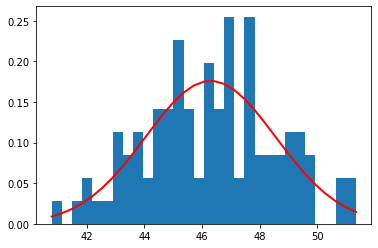

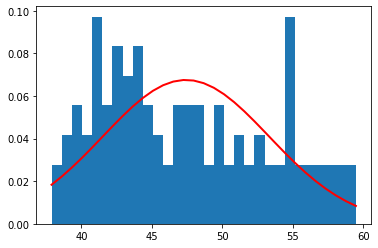

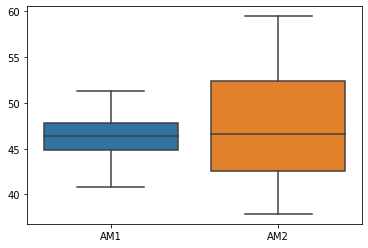

In [120]:
sigma = np.std(df_base_02['AM1'])
mu = np.mean(df_base_02['AM1'])

count, bins, ignored = plt.hist(df_base_02['AM1'], 30, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

sigma = np.std(df_base_02['AM2'])
mu = np.mean(df_base_02['AM2'])

count, bins, ignored = plt.hist(df_base_02['AM2'], 30, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

ax = sns.boxplot(data=df_base_02)
plt.show()

In [121]:
teste_normal(df_base_02['AM1'])
teste_normal(df_base_02['AM2'])

Statistics=0.994, pvalue=0.923
Distribuição da variável AM1 é normal (falha ao rejeitar H0)

Statistics=0.950, pvalue=0.001
Distribuição da variável AM2 não é normal(rejeita H0)



***RESULTADO:***

Distribuição da variável AM1 **é normal** (falha ao rejeitar H0) 

Distribuição da variável AM2 **não é normal**(rejeita H0)


**4. SITUAÇÃO PROBLEMA:**

Um estudioso nutricionista e professor de educação física desenvolveu um novo método de treinamento funcional para obter ganhos de massa muscular e redução de percentual de gordura e, para avaliá-lo, resolveu usar um teste t pareado para determinar se um grupo de 100 participantes melhorou sua condição física depois de adotar o seu programa por 8 semanas.

Para tanto, ele anotou a pontuação da condição física dos 100 participantes ANTES e DEPOIS do treinamento.

Assim, temos que a variável **AM1** representa o **ANTES** e a variável **AM2** representa o **DEPOIS**

**5. REALIZAÇÃO DO TESTE T-PAREADO**

In [ ]:
from scipy.stats import ttest_rel
tset, p_valor = ttest_rel(df_base_02['AM1'], df_base_02['AM2'])

# Verifica o resultado do p-value
print("O p-valor é " + str(p_valor))
if p_valor > 0.05:
    print('\nNão podemos rejeitar a Hipótese nula de que as 2 amostras relacionadas têm valores médios (esperados) idênticos. (falha ao rejeitar H0)\n')
else:
    print('\nRejeitamos a Hipótese nula de que que as 2 amostras relacionadas têm valores médios (esperados) idênticos (rejeita H0)\n') 

O p-valor é 0.09227796271100261

Não podemos rejeitar a Hipótese nula de que as 2 amostras relacionadas têm valores médios (esperados) idênticos. (falha ao rejeitar H0)



**6. CONCLUSÃO**

TENDO EM VISTA QUE NÃO HOUVE ALTERAÇÃO NA MÉDIA DA PONTUAÇÃO DOS PARTICIPANTES APÓS A REALIZAÇÃO DO TREINAMENTO FUNCIONAL POR 8 SEMANAS, CONCLUI-SE QUE NÃO HÁ EVIDÊNCIAS PARA AFIRMAR QUE O NOVO MÉTODO É EFICAZ E APRESENTA RESULTADOS POSITIVOS POR QUEM O PRATICA.

**BASE DE DADOS 03**
---


**OBJETIVO:**

Neste banco encontram-se amostras de quatro subpopulações respondentes de uma pesquisa (a ser inventada pr você). As respostas são “Sim”, “Não” e “Talvez”. Aqui você deve realizar um teste de independência para as subpopulações.

In [4]:
#----------------------------------------------------------------------------------------------------
# Arquivo/pasta do GitHub contendo os dados da BASE 03
#----------------------------------------------------------------------------------------------------
s_githubpath_entrada = 'https://raw.githubusercontent.com/rlgarcia79/ENAP_CienciaDados/main/'
s_arquivo_entrada = 'rafael.leal.garciabase3.csv'

#-----------------------------------------------------------------------------
# Carrega o arquivo com os dados da BASE 02
#-----------------------------------------------------------------------------
df_base_03 = pd.read_csv(s_githubpath_entrada + s_arquivo_entrada)

**1. EXPLORANDO A BASE DE DADOS 03**

In [5]:
# Qtde de linhas e colunas
df_base_03.shape

(2000, 4)

In [6]:
#Primeiros registros
df_base_03.head(5)

,subpop1,subpop2,subpop3,subpop4
0,sim,não,não,não
1,sim,talvez,não,não
2,não,não,sim,talvez
3,não,não,sim,talvez
4,sim,não,sim,não


In [7]:
#Ultimos registros
df_base_03.tail(5)

,subpop1,subpop2,subpop3,subpop4
1995,sim,não,sim,talvez
1996,não,sim,sim,talvez
1997,não,talvez,sim,talvez
1998,talvez,não,não,talvez
1999,sim,sim,talvez,talvez


***RESULTADO:***

*1) A base contém quatro colunas, representando quatro subpopulações (subpop1	subpop2	subpop3	subpop4) com 2000 registros cada. Portanto, temos no total uma coleta de 8.000 registros.*

*2) Não existem registros NULOS*

*3) As quatro colunas são do tipo string (object)*

*TRATA-SE DE UMA BASE DE DADOS COM VARIÁVEIS CATEGÓRICAS*

**2. SITUAÇÃO PROBLEMA:**

A fim de verificar a relação entre a faixa etária dos usuários de um novo aplicativo para smartphone (aplicativo APP) e a sua satisfação ao utilizá-lo, a empresa desenvolvedora do software realizou uma pesquisa com os usuários do aplicativo, divididos em quatro faixas etárias, que questionou a possibilidade deles indicarem o novo aplicativo a alguém. 

Para cada faixa etária foram escolhidos aleatoriamente 2.000 usuários que responderam a seguinte pergunta: 

*"Você recomendaria o uso do aplicativo APP?"*

As respostas possíveis são "*Sim*", "*Não*" e "*Talvez*"

As quatro faixas etárias escolhidas foram:

*   subpop1 = "*Entre 21 a 30 anos*"
*   subpop2 = "*Entre 31 a 40 anos*"
*   subpop3 = "*Entre 41 a 50 anos*"
*   subpop4 = "*Entre 51 a 60 anos*"


Portanto, a partir dos resultados coletados na pesquisa, a empresa deseja saber se há alguma relação entre a faixa etária dos usuários do aplicativo com a possibilidade deles o recomendarem a alguém.



**3. CRIA TABELA DE CONTINGÊNCIA**

DATAFRAME COM A SUMARIZAÇÃO DOS DADOS DAS RESPOSTAS PARA CADA SUBPOPULAÇÃO `

In [10]:
df_stack = df_base_03.stack()
df_stack = pd.DataFrame(df_stack)
df_stack.reset_index(inplace=True)

df_stack.columns = ['ind', 'faixa_etaria', 'recomenda_uso']
df_pivot = pd.pivot_table(df_stack, columns='recomenda_uso', index='faixa_etaria', values='ind', aggfunc='count')

print(df_pivot.sum(axis=0))
print(df_pivot.sum(axis=1))

recomenda_uso
não       1941
sim       4270
talvez    1789
dtype: int64
faixa_etaria
subpop1    2000
subpop2    2000
subpop3    2000
subpop4    2000
dtype: int64


In [11]:
df_pivot

recomenda_uso,não,sim,talvez
faixa_etaria,,,
subpop1,565,1234,201
subpop2,591,986,423
subpop3,187,1614,199
subpop4,598,436,966


**DEFINIÇÃO DO TESTE**

CONSIDERANDO QUE:

*   AS VARIÁVEIS SÃO CATEGÓRICAS
*   A AMOSTRA É ALEATÓRIA
*   AS OBSERVAÇÕES DA PESQUISA SÃO INDEPENDENTES 

ENTÃO PODEMOS UTILIZAR O TESTE DE QUI-QUADRADO PARA VERIFICAR A HIPÓTESE NULA DE QUE AS VARIÁVEIS SÃO ESTATISTICAMENTE INDEPENDENTES. 

**4. REALIZA O TESTE DO QUI-QUADRADO PARA VERIFICAR A INDEPENDÊNCIAS DAS VARIÁVEIS**

In [12]:
from scipy.stats import chi2_contingency

a_matrix = np.matrix(df_pivot)
chi_val, p_valor, dof, expected = chi2_contingency(a_matrix)

print(chi_val, "\n", p_valor, "\n", dof, "\n", expected)

1807.5799346519152 
 0.0 
 6 
 [[ 485.25 1067.5   447.25]
 [ 485.25 1067.5   447.25]
 [ 485.25 1067.5   447.25]
 [ 485.25 1067.5   447.25]]


In [13]:
# Verifica o resultado do p-value
print("O p-valor é " + str(p_valor))
if p_valor > 0.05:
    print('As variaveis são INDEPENDENTES (falha ao rejeitar H0)\n')
else:
    print('As variaveis são DEPENDENTES (rejeita H0)\n') 

O p-valor é 0.0
As variaveis são DEPENDENTES (rejeita H0)



**4.1 Utilizando outro método para testar a independência**

In [14]:
!pip install bioinfokit
from bioinfokit.analys import stat

res = stat()
res.chisq(df=df_pivot)

print(res.summary)

     |████████████████████████████████| 84 kB 1.7 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.6-py3-none-any.whl size=57066 sha256=4ebd765152fd60af6319890f40fbc9e68a3db49492a1721e99be13f6d62bbfc7
  Stored in directory: /root/.cache/pip/wheels/38/b2/a0/3f65c463d3faababa8cb5f3076e3bfc1c49fea2a736a49038a
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7094 sha256=9b83634318e1948904007c17406446d5ab73b7bd82002e93f92fafb8a21f808a
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            6       1807.58          0
Log-likelihood     6       1849.69          0



**4.2 Mesmo fazendo testes com a combinação de apenas algumas subpopulações, o resultado do p-valor é sempre inferior a 0,05. Portanto, sempre DEPENDENTES!**

In [15]:
from scipy.stats import chi2_contingency

#Exclui subpop4
observed = np.array([[565,	1234,	201], [591,	986,	423], [187,	1614,	199]]) 
chi_val, p_valor, dof, expected = chi2_contingency(observed)
print("O p-valor é " + str(p_valor))

#Exclui subpop3 e subpop4
observed = np.array([[565,	1234,	201], [187,	1614,	199]]) 
chi_val, p_valor, dof, expected = chi2_contingency(observed)
print("O p-valor é " + str(p_valor))

#Exclui subpop1
observed = np.array([[591,	986,	423], [187,	1614,	199], [598,	436,	966]]) 
chi_val, p_valor, dof, expected = chi2_contingency(observed)
print("O p-valor é " + str(p_valor))

#Exclui subpop2
observed = np.array([[565,	1234,	201], [187,	1614,	199], [598,	436,	966]]) 
chi_val, p_valor, dof, expected = chi2_contingency(observed)
print("O p-valor é " + str(p_valor))

#Exclui subpop1 e subpop2
observed = np.array([[187,	1614,	199], [598,	436,	966]]) 
chi_val, p_valor, dof, expected = chi2_contingency(observed)
print("O p-valor é " + str(p_valor))

O p-valor é 3.635516735756974e-108
O p-valor é 5.356049976436081e-53
O p-valor é 0.0
O p-valor é 0.0
O p-valor é 4.258057576214931e-304


**4.3 Mapa de calor para tentar visualizar a dependência das variáveis**

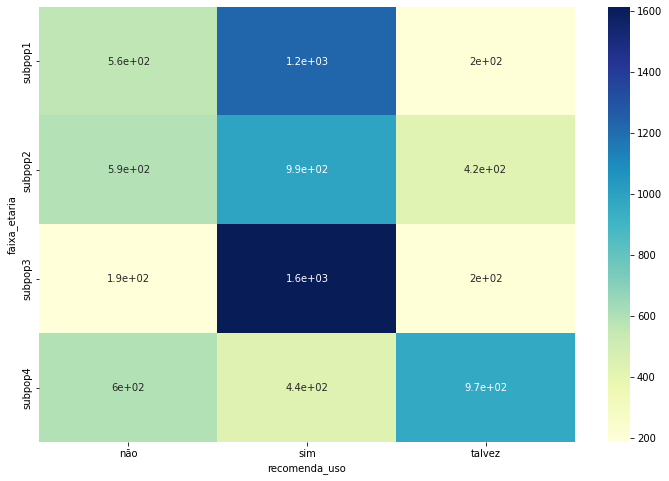

In [16]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df_pivot, annot=True, cmap="YlGnBu")

**5. CONCLUSÃO**

*COM UM NÍVEL DE 5%, TEMOS QUE SAS VARIÁVEIS **FAIXA ETÁRIA** E **POSSIBILIDADE DE RECOMENDAÇÃO DO USO DO APLICATIVO APP** TEM ALGUMA RELAÇÃO E SÃO **DEPENDENTES**!*

